<a href="https://colab.research.google.com/github/SnaraC/Machine-Learning-Research-Project/blob/main/Capstone_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
# Import the data

#data = pd.read_excel('/content/sample_data/Dataset_A_dataset.xlsx')
#data = pd.read_excel('/content/sample_data/updatedData.xlsx')
#data = pd.read_csv('/content/sample_data/Dataset_B_dataset.csv')

# Remove missing data

data.dropna(axis=0, inplace=True)

(515, 102)


In [ ]:
#Choose the target output

#x = data.drop(['Y1MED1FF', 'PHQ', 'subject'], axis=1)
#y = data['Y1MED1FF']

#x = data.drop(['target'], axis=1)
#y = data['target']

In [ ]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Oversampling balancing technique
#smote = SMOTE(sampling_strategy='auto')
#X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Random Undersampling balancing technique
#undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = undersampler.fit_resample(X_scaled, y)

# Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Model selection and apply
model = LogisticRegression()

model = make_pipeline(StandardScaler(), model)

model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

0.6796116504854369
F1 score:  0.35294117647058826
[[61 10]
 [23  9]]


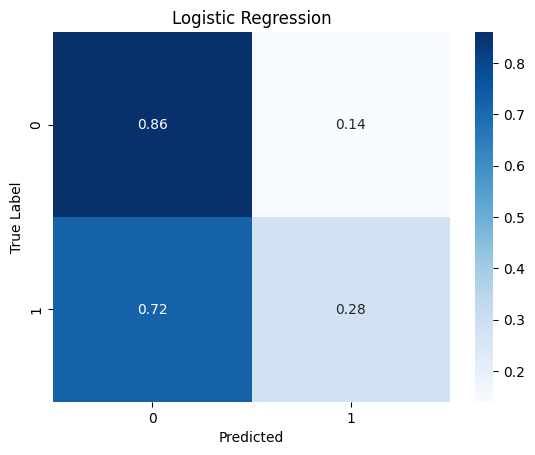

In [ ]:
# Predict accuracy and f1 score

y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

percentage_cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

sns.heatmap(percentage_cm, annot=True, cmap='Blues', xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Logistic Regression')
plt.show()